# Sampling and reconstruction
This notebook will illustrate some effects of sampling and reconstruction

## The sampling theorem
[Shannon's sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) says that a continuous-time signal with Fourier transform that is zero outside the interval $(-\omega_0, \omega_0)$ can be completely reconstructed from equidistant samples of the signal, as long as the sampling frequency is at least $2\omega_0$.

In [2]:
using PyPlot

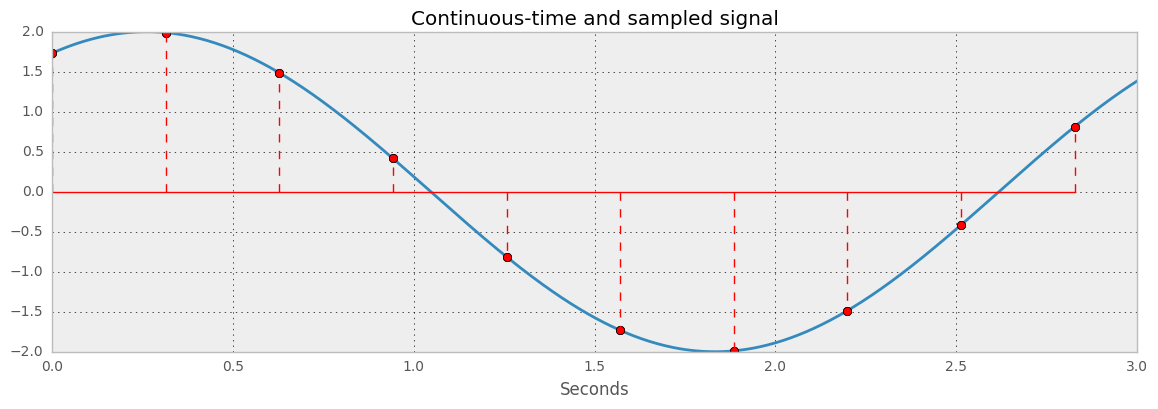

PyObject <matplotlib.text.Text object at 0x7f5b552a0b90>

In [35]:
ω0 = 2;
x(t) = 2*sin(ω0*t + pi/3);
t = linspace(0, 3, 700);
figure(figsize=(14,4));
pc = plot(t, x(t), linewidth=2);
xlabel("Seconds")

ωs = 20; # > 2ω0
h = 2*pi/ωs;
td = 0:h:3;
pd = plot(td, x(td), "o");
stem(td, x(td), linefmt="r--", markerfmt="ro", basefmt = "r-");
title("Continuous-time and sampled signal")

## Reconstruction
Consider the continuous-time signal $x(t)$, which is sampled with sampling period $h$ and thus sampling frequency $$\omega_s = \frac{2\pi}{h}$$
to give the sampled signal $x[k] = x(kh)$. We assume that the signal $x(t)$ is bandlimited with frequency content zero above the frequency $\omega_0 < \omega_s/2$. 

The signal can be reconstructed by the interpolation 
$$ 
\DeclareMathOperator{\sinc}{sinc}
x(t) = \sum_{k=-\infty}^{\infty} x(kh) \sinc \frac{\omega_s(t-kh)}{2} = \sum_{k=-\infty}^{\infty} x(kh) \frac{ \sin \big(\omega_s(t-kh)/2\big)}{\omega_s(t-kh)/2}
$$


### The sinc function
The Fourier transform of the $\sinc$ function is the [rectangular function](https://en.wikipedia.org/wiki/Rectangular_function), illustrated below.   

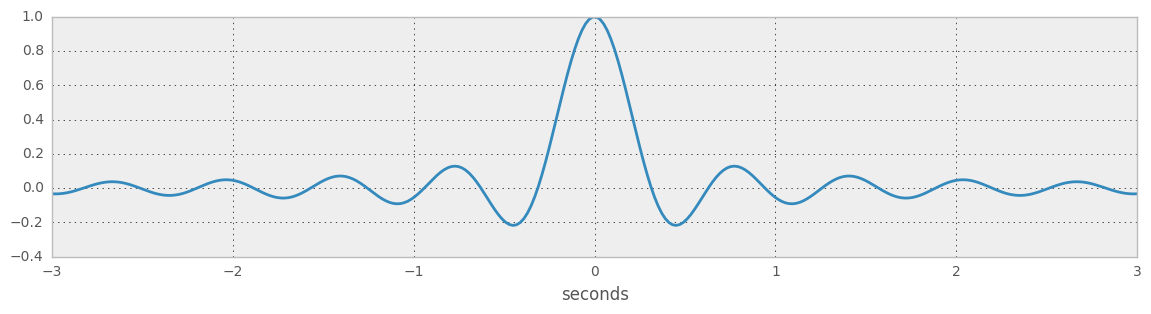

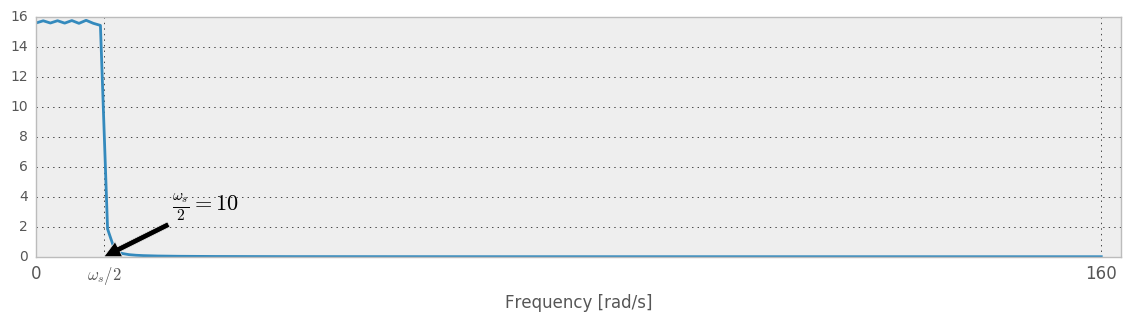

In [53]:
# The sinc function and its Fourier transform
N = 300;
Nhalf = div(300,2)
ts = linspace(-3,3,N);
dt = (3+3)/N;
ωfft = 2π/dt;

figure(figsize=(14,3))
ps = plot(ts, sinc(ωs*ts/2/π), linewidth=2); # Note that the sinc function in julia is defined as sin(πx)/(πx)

xlabel("seconds")

S = fft(sinc(ωs*ts/2/π)); 
w = linspace(0, ωfft/2, Nhalf)
figure(figsize=(14,3))
pS = plot(w[1:Nhalf], abs(S[1:Nhalf]), linewidth=2)
annotate(L"$\frac{\omega_s}{2}=10$ rad/s",
xy=[ωs/2;0],# Arrow tip
    xytext=[ωs/2+10;3], # Text offset from tip
size=16,
    xycoords="data", # Coordinates in in "data" units
arrowprops=Dict("facecolor"=>"black")) # Julia dictionary objects are automatically converted to Python object when they pass into a PyPlot function
#arrowprops=Dict("arrowstyle"=>"->", "facecolor"=>"black")) # Julia dictionary objects are automatically converted to Python object when they pass into a PyPlot function

xticks([0, ωs/2, ωfft/2], ("0", L"$\omega_s/2$", "160"), fontsize="large");
xlabel("Frequency [rad/s]");

### Exercise
Why is the Fourier transform plotted above not a perfect rectangular function?

In [19]:
?fft

search: fft fft! FFTW fftshift rfft ifft bfft ifft! bfft! ifftshift irfft brfft



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`.  The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along.  Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`.  See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].$
A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

Higher performance is usually possible with multi-threading. Use `FFTW.set_num_threads(np)` to use `np` threads, if you have `np` processors.


In [36]:
?sinc

search: sinc significand isinteractive IntrinsicFunction DimensionMismatch



```
sinc(x)
```

Compute $\sin(\pi x) / (\pi x)$ if $x \neq 0$, and $1$ if $x = 0$.
